La société souhaite analyser l’intérêt des livres ( les mieux notés ) dans le réseau social Twitter. Pour cela, votre manager vous demande de collecter tous les tweets via l’API de tweeter liés à ces livres depuis le 01/06/2022. La quantité de tweet liés à chaque livre sera entre 700 et 1000. Les livres à analyser seront : 
the Art of War, The song of Achille, Batman : the Dark Night Return, The Picture of Dorian Gray, The Book Thief. 
Il vous est demandé pour la collecte des tweets associés à chaque livre. Les tweet associés à chaque livre sont exportés en csv.
Voici les visualisations au minimum attendues: une analyse nuage de mots à représenter et la fréquence des bigrammes et trigrammes

In [231]:
# missions : faire les analyses
# faire le readme, relire le brief pour envoyer les bons dossiers

In [232]:
import pandas as pd 
import re
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# I. Créer les DF

In [233]:
the_song = pd.read_csv("data/the_song_of_achilles.csv",  sep="|")
Batman = pd.read_csv("data/Batman.csv",  sep="|")
thief = pd.read_csv("data/The_Book_Thief.csv",  sep="|")
Dorian = pd.read_csv("data/The_Picture_of_Dorian_Gray.csv",  sep="|")
war = pd.read_csv("data/the_Art_of_War.csv",  sep="|")

# II. Nettoyage des données 

In [234]:
def nettoyage(ma_df):
    # enlever les pseudos et les liens 
    ma_df["renderedContent"] = ma_df["renderedContent"].str.replace(r'@\S*', '', regex=True).str.replace(r'http\*', '', regex=True)
    # enlever les smileys et caractères spéciaux 
    ma_df["renderedContent"] = ma_df["renderedContent"].apply(lambda x: re.sub(r'[^\w\s]', '', x))
    # enlever les espaces 
    ma_df['renderedContent'] = ma_df['renderedContent'].str.strip()
    # Conversion des phrases en majuscule
    ma_df["renderedContent"] = ma_df["renderedContent"].str.capitalize()

nettoyage(the_song)
nettoyage(Batman)
nettoyage(thief)
nettoyage(Dorian)
nettoyage(war)

war["renderedContent"]

0      Quality rankings 1perfection christiancommunis...
1      The only one of the books on that list that to...
2      The art of war is really funny to me because l...
3                             I have read the art of war
4      He doesnt run remember back in jaya when he sa...
                             ...                        
995    I fucking always crack up when i see people ad...
996    The art of war \nall warfare is based on decep...
997    Art of war had something negative to say about...
998    I think you can safely shift 65 days from your...
999    Art of war is the best book on here bro trust ...
Name: renderedContent, Length: 1000, dtype: object

# III .Analyse

### 1. Fonction nuage de mots

In [235]:
def nuage_de_mots(ma_df, liste_de_stopwords):
    # Sélectionnez la colonne 'renderedContent' du dataframe
    words = ma_df['renderedContent'].str.cat(sep=' ')

    # Créez une liste de stopwords en anglais
    stopwords = nltk.corpus.stopwords.words('english')

    # Ajoutez vos propres stopwords à la liste
    stopwords.extend(liste_de_stopwords)

    # Convertissez la liste en ensemble pour une recherche plus rapide
    stopwords = set(stopwords)

    # Filtrez les mots de la chaîne de caractères en utilisant la liste de stopwords
    filtered_words = [word for word in words.split() if word not in stopwords]

    # Reconstruisez la chaîne de caractères à partir de la liste de mots filtrés
    filtered_words = ' '.join(filtered_words)
    
    # Compter les mots dans la chaîne de caractères filtered_words
    word_counts = Counter(filtered_words.split())

    # Garder les 50 mots les plus fréquents
    most_common_words = word_counts.most_common(50)

    # Créer un dictionnaire qui associe chaque mot à sa fréquence d'apparition
    word_frequencies = {word: frequency for word, frequency in most_common_words}
    # Créez l'objet WordCloud à partir de la chaîne de caractères filtrée
    wordcloud = WordCloud().generate(filtered_words).generate_from_frequencies(word_frequencies)

    # Affichez le nuage de mots
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

### 2. Fonctions bigrames et trigrames 

In [236]:
def bigrames (ma_df):
    #séparer les caractères
    words = ma_df['renderedContent'].str.cat(sep=' ')
    
    #créer les bigrames
    nltk_tokens = nltk.word_tokenize(words)
    nltk_tokens = list(nltk.bigrams(nltk_tokens))

    # calculer ma fréquence
    bigrams = nltk.FreqDist(nltk_tokens).items()

    # le passer en dataframe pour trier
    df_bigrams= pd.DataFrame(bigrams)
    df_bigrams = df_bigrams.sort_values(by=[1], ascending=False)
    
    return df_bigrams

In [237]:
def trigrames (ma_df):
    #créer les trigrames
    bigram_words = ma_df['renderedContent'].str.cat(sep=' ')
    
    nltk_tokens_trig = nltk.word_tokenize(bigram_words)
    nltk_tokens_trig = list(nltk.trigrams(nltk_tokens_trig))

    # calculer ma fréquence
    nltk_tokens_trig = nltk.FreqDist(nltk_tokens_trig).items()

    # le passer en dataframe pour trier
    df_nltk_tokens_trig = pd.DataFrame(nltk_tokens_trig)
    df_nltk_tokens_trig = df_nltk_tokens_trig.sort_values(by=[1], ascending=False)
    
    return df_nltk_tokens_trig

### 3. Livres 

#### a.  The Song of Achilles

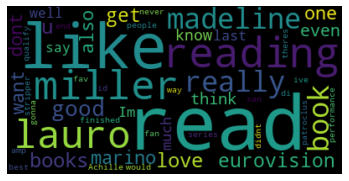

                              0    1
4                   (the, song)  863
5                    (song, of)  838
10                (of, achille)  668
178                 (The, song)  179
15                    (of, the)  170
...                         ...  ...
697             (response, The)    1
4567  (httpstco65anutngls, Atm)    1
4568                (blue, The)    1
4569              (achille, My)    1
4570                   (me, Me)    1

[4571 rows x 2 columns]
                             0    1
10         (song, of, achille)  664
4              (the, song, of)  659
192            (The, song, of)  176
5         (song, of, achilles)  150
82          (of, achille, and)   82
...                        ...  ...
5569        (blue, The, seven)    1
5570         (of, achille, My)    1
5571  (achille, My, policeman)    1
5572            (upon, me, Me)    1
5573         (me, Me, sitting)    1

[5574 rows x 2 columns]


In [238]:
nuage_de_mots(the_song, ['achille', 'song', 'achilles', 'chant', 'dachille', 'The', 'I', 'im', 'i m'])
print(bigrames(the_song))
print(trigrames(the_song))

#### b. The Book Thief

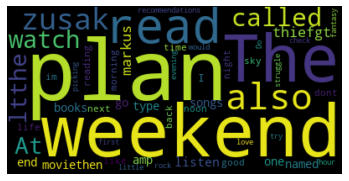

                     0    1
4        (book, thief)  865
3          (the, book)  569
105        (The, book)  269
136    (weekend, plan)  244
108    (this, weekend)  244
...                ...  ...
4262     (cook, makes)    1
4261       (amp, cook)    1
4260      (veale, amp)    1
4259       (by, veale)    1
10532   (daughter, of)    1

[10533 rows x 2 columns]
                         0    1
3       (the, book, thief)  546
108     (The, book, thief)  264
111    (At, this, weekend)  122
113     (weekend, i, plan)  122
114          (i, plan, to)  122
...                    ...  ...
5180     (book, by, veale)    1
5181      (by, veale, amp)    1
5182    (veale, amp, cook)    1
5183    (amp, cook, makes)    1
13800  (daughter, of, war)    1

[13801 rows x 2 columns]


In [239]:
nuage_de_mots(thief, ['thief', 'book'])
print(bigrames(thief))
print(trigrames(thief))

#### c. The Picture of Dorian Gray

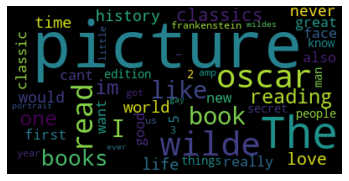

,0,1
12,"(of, dorian, gray)",867
11,"(picture, of, dorian)",865
10,"(the, picture, of)",526
107,"(The, picture, of)",278
20,"(by, oscar, wilde)",78
...,...,...
6169,"(daisy, jones, amp)",1
6170,"(jones, amp, the)",1
6171,"(amp, the, six)",1
6172,"(the, six, klara)",1


In [240]:
nuage_de_mots(Dorian, ['dorian', 'gray'])
bigrames(Dorian)
trigrames(Dorian)

#### d. The Art of War

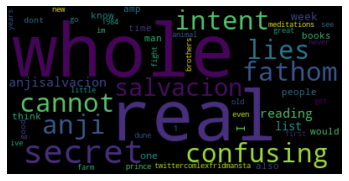

,0,1
51,"(art, of, war)",992
23,"(the, art, of)",591
81,"(The, art, of)",132
1140,"(tzu, art, of)",106
1139,"(sun, tzu, art)",105
...,...,...
7141,"(to, getting, rid)",1
7140,"(solution, to, getting)",1
7139,"(a, solution, to)",1
7138,"(find, a, solution)",1


In [241]:
nuage_de_mots(war, ['war', 'art', 'sun', 'tzu', 'like', 'enemy', 'The', 'read', 'book'])
bigrames(war)
trigrames(war)

#### e. Batman : the Dark Night Return

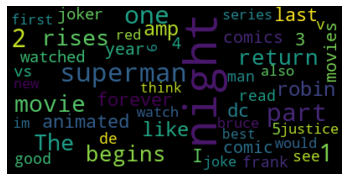

,0,1
6,"(the, dark, night)",702
35,"(dark, night, returns)",507
89,"(the, dark, knight)",310
5,"(batman, the, dark)",255
90,"(dark, knight, returns)",208
...,...,...
7518,"(huge, hes, always)",1
7519,"(hes, always, been)",1
7520,"(always, been, big)",1
7521,"(been, big, and)",1


In [242]:
nuage_de_mots(Batman, ['batman', 'dark', 'knight', 'returns', 'Batman'])
bigrames(Batman)
trigrames(Batman)

### A. Analyse générale

Nuage de points : quand les stopwords sont bien employés, le nuage permet de comprendre certains concepts important liés au livre. 

Bigram et trigrams : il faut ajouter des stopwords.